In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Get transcription data
transcription_path = './data/VAM_Audio/docu/transcription.xls'
transcription = pd.read_excel(transcription_path,usecols="A,C:F",skiprows=1,dtype={'File name': 'string', 'Transcription': 'string'})

#Create new column based on string in file name
transcription['File name']

#Split string and add column
speakerid = transcription['File name'].str[4:6]
transcription.insert(1,'SpeakerID', speakerid)
transcription = transcription.astype({'SpeakerID':'int'})

#Read age and gender from another file

age_gender_path = './data/VAM_Audio/docu/speakers.xls'
age_gender_speakers = pd.read_excel(age_gender_path,usecols="A,B,D,E",skiprows=1,dtype={'Name': 'string','Gender': 'string'})

#ID 47 has invalid age, change to na?
age_gender_speakers['Age'][46] = float("nan")

#Rename speakerID to be same in both dataframes
age_gender_speakers = age_gender_speakers.rename(columns={'ID in VAM-Audio':'SpeakerID'})

#Join columns

speakers_df = pd.merge(transcription,age_gender_speakers, how='left', on='SpeakerID')

speakers_df


C:\Users\madha\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,File name,SpeakerID,Transcription,Valence,Activation,Dominance,Name,Age,Gender
0,Satz01000,1,Deine Verlobte!,-0.4777,-0.0258,-0.0982,Nancy,23,female
1,Satz01001,1,Du bist der Vater von Alexander !,-0.6190,0.7362,0.6136,Nancy,23,female
2,Satz01002,1,Ich wohne in Hörding.,-0.0623,0.1747,0.0800,Nancy,23,female
3,Satz01003,1,"Du hast ständig vom Jugendamt Briefe gekriegt,...",-0.5860,0.4095,0.3763,Nancy,23,female
4,Satz01004,1,Ich habe die hier mit.,-0.2002,-0.4418,-0.2721,Nancy,23,female
...,...,...,...,...,...,...,...,...,...
942,Satz47001,47,Das stimmt nicht; ich dürfte zu meinem Vater w...,-0.3588,-0.3437,-0.1053,Saskia,NaN,female
943,Satz47002,47,"Papa, lüge nicht, mach nicht so ein Gesicht.",-0.4421,-0.1637,-0.0321,Saskia,NaN,female
944,Satz47003,47,"Hör auf, hier zu lügen, Papa.",-0.4292,-0.4023,-0.1379,Saskia,NaN,female
945,Satz47004,47,"Und er war mit ihr zusammen, er hat auch meine...",-0.4457,-0.0803,-0.3093,Saskia,NaN,female


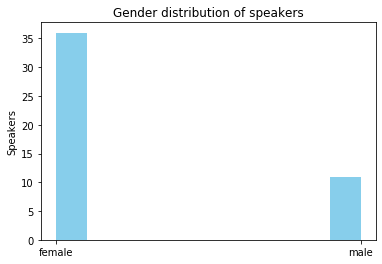

female    36
male      11
Name: Gender, dtype: Int64

In [4]:
# Data exploration

#Check distribution of male and female

plt.hist(age_gender_speakers['Gender'],fill=True,color=['skyblue'])
plt.title("Gender distribution of speakers")
plt.ylabel("Speakers")
plt.show()
age_gender_speakers["Gender"].value_counts()

In [21]:
# Mean age

age_gender_speakers['Age'].mean() #30.7

age_gender_speakers['Age'].std() #11.4

# Mean emotion labels

speakers_df['Valence'].mean() # -0.22
speakers_df['Activation'].mean() #0.02

0.027951319957761265

C:\Users\madha\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\madha\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


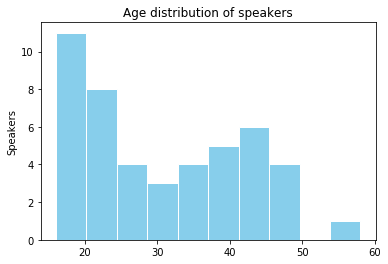

In [4]:
#Check distribution of age
plt.hist(age_gender_speakers['Age'],fill=True,color=['skyblue'],edgecolor='white')
plt.title("Age distribution of speakers")
plt.ylabel("Speakers")
plt.show()

In [137]:
# female = age_gender_speakers['Age'].loc[age_gender_speakers['Gender'] == 'female']
# male = age_gender_speakers['Age'].loc[age_gender_speakers['Gender'] == 'male']
# bins = np.linspace(20,60,10)
# plt.hist(female,bins=bins, alpha=0.5,color=['skyblue'],edgecolor='white')
# plt.hist(male,bins=bins,alpha=0.5,color=['blue'],edgecolor='white')
# plt.xticks(range(20,70,10))
# plt.show()

C:\Users\madha\anaconda3\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\madha\anaconda3\lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


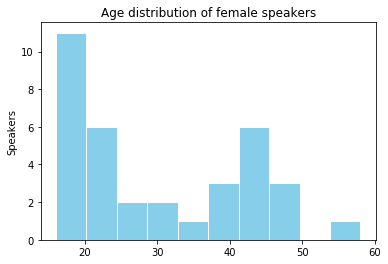

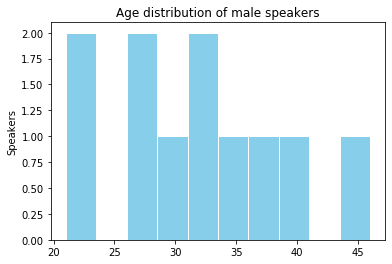

In [5]:
#Age distribution per gender
female = age_gender_speakers['Age'].loc[age_gender_speakers['Gender'] == 'female']
plt.hist(female,fill=True,color=['skyblue'],edgecolor='white')
plt.title("Age distribution of female speakers")
plt.ylabel("Speakers")
plt.show()

#Age distribution per gender
male = age_gender_speakers['Age'].loc[age_gender_speakers['Gender'] == 'male']
plt.hist(male,fill=True,color=['skyblue'],edgecolor='white')
plt.title("Age distribution of male speakers")
plt.ylabel("Speakers")
plt.show()

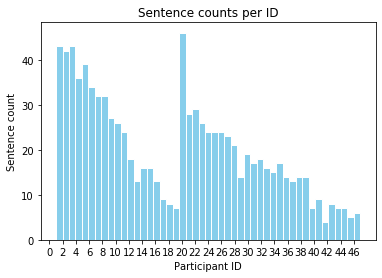

In [6]:
# Sentences per speaker ID

sentences_per_id = plt.hist(speakers_df['SpeakerID'],fill=True,color=['skyblue'],bins=47,edgecolor='white')
plt.xticks(np.arange(0,47,2))
plt.title("Sentence counts per ID")
plt.xlabel("Participant ID")
plt.ylabel("Sentence count")
plt.show()



In [26]:
sentences_per_id_speakers = speakers_df.groupby('SpeakerID')['Transcription'].count().reset_index()
print(sentences_per_id_speakers['Transcription'].mean())
print(sentences_per_id_speakers['Transcription'].median())

20.148936170212767
17.0


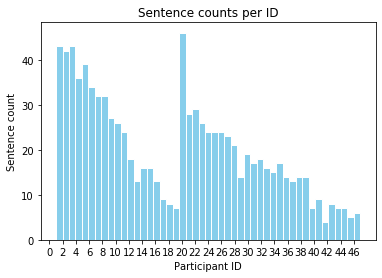

In [27]:
# Mean and median sentences per speaker

sentences_per_id = plt.hist(speakers_df['SpeakerID'],fill=True,color=['skyblue'],bins=47,edgecolor='white')
plt.xticks(np.arange(0,47,2))
plt.title("Sentence counts per ID")
plt.xlabel("Participant ID")
plt.ylabel("Sentence count")
plt.show()

In [39]:
# Average sentence length in characters (including whitespace)

speakers_df['Transcription'].apply(len).mean()

#Average sentence length per speaker
#speakers_df['Transcription'].loc[speakers_df['SpeakerID'] == 42].apply(len).mean()

#Find number of words in sentences

sentence_length = []

for i in range(len(speakers_df)):
    words = str.split(speakers_df['Transcription'][i])
    sentence_length.append(len(words))
    
np.mean(sentence_length)

11.315733896515312

(array([ 7.,  7.,  4., 17.,  7.]),
 array([-0.6774 , -0.55636, -0.43532, -0.31428, -0.19324, -0.0722 ]),
 <a list of 5 Patch objects>)

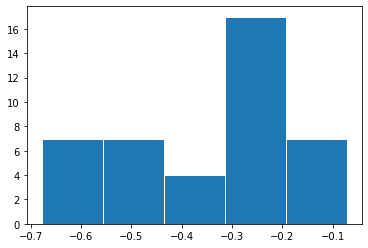

In [94]:
# Valence, Activation per speakerID

plt.hist(speakers_df['Valence'].loc[speakers_df['SpeakerID'] == 2],bins=5,edgecolor='white')


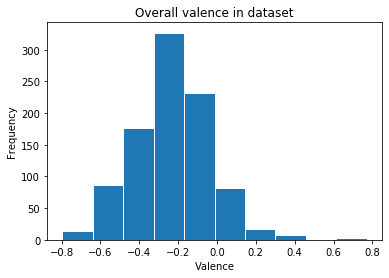

In [89]:
#Find overall arousal, valence in dataset

plt.hist(speakers_df['Valence'],edgecolor='white')
plt.title("Overall valence in dataset")
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.show()

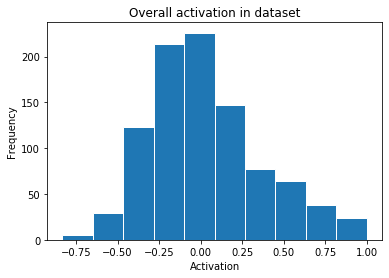

In [88]:
plt.hist(speakers_df['Activation'],edgecolor='white')
plt.title("Overall activation in dataset")
plt.xlabel("Activation")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Get all the sound files

#Run the following code if speech folder does not exist
#!bash combine_audio.sh 

import librosa

speech_path = './data/VAM_Audio/data/speech/'


In [24]:
#Add length of each wav file to get total duration

speech = 0

for speech_files in os.listdir(speech_path):
    duration = librosa.get_duration(filename=speech_path+speech_files)
    speech = speech + duration
    
print("Total duration of speech data in minutes:", speech/60)


Total duration of speech data in minutes: 47.80733333333329


In [25]:
#Create dataframe (Filename and duration of speech)

speech_duration_df = pd.DataFrame(columns=["File name", "SpeechDuration(s)"])


for speech_files in os.listdir(speech_path):
    duration = librosa.get_duration(filename=speech_path+speech_files)
    filename = speech_files.replace(".wav","")
    speech_duration_df = speech_duration_df.append({'File name': filename, 'SpeechDuration(s)': duration},ignore_index=True)
    
speech_duration_df
        
#Align transcript and speech duration

speakers_speech_data_df = pd.merge(speakers_df,speech_duration_df, how='left', on='File name')

#Find total duration per speaker

speaker_total_duration = speakers_speech_data_df.groupby('SpeakerID')['SpeechDuration(s)'].sum()

In [26]:
speaker_total_duration_np = speaker_total_duration.to_numpy(copy=True)

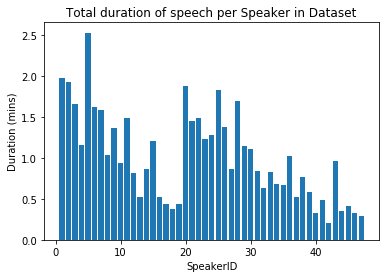

In [27]:
speaker_total_duration_np
x_bar = np.arange(1,48,1)

plt.bar(x_bar,speaker_total_duration_np/60)
plt.xlabel("SpeakerID")
plt.ylabel("Duration (mins)")
plt.title("Total duration of speech per Speaker in Dataset")
plt.show()

In [30]:
#Mean speaker duration

speaker_total_duration_np.mean()/60

1.0171773049645387

In [32]:
# Build corpus with nltk

import nltk

corpus = nltk.word_tokenize(sentence_corpus_words)


NameError: name 'sentence_corpus_words' is not defined

In [50]:
# Top words

#Build a corpus from transcription
corpus = []
sentence_corpus = speakers_df['Transcription'].str.split()
sentence_corpus_words = sentence_corpus.values.tolist()

for words in sentence_corpus_words:
    for word in words:
        corpus.append(word)
        
#speakers_df['Transcription'].value_counts()

In [65]:
# Average words including punctuation in sentence

length_of_sentence = []

for i in range(len(sentence_corpus)):
    length_of_sentence.append(len(sentence_corpus[i]))
    
len(sentence_corpus[1])

7

In [34]:
# Change corpus to have all lowercase

corpus = list(map(str.lower,corpus))

In [35]:
# Remove punctuation from corpus

import string
from collections import Counter

table = str.maketrans('', '', string.punctuation)

corpus = [word.translate(table) for word in corpus]


In [45]:
# Remove "" from corpus

print("Length of corpus before:",len(corpus))
for i in corpus:
        if(i == ""):
            corpus.remove(i)
            
print("Length of corpus after:",len(corpus))

Length of corpus before: 10716
Length of corpus after: 10694


In [46]:
# Vocabulary size

len(corpus)

10694

In [48]:
#Unique words

len(Counter(corpus).values())

1644

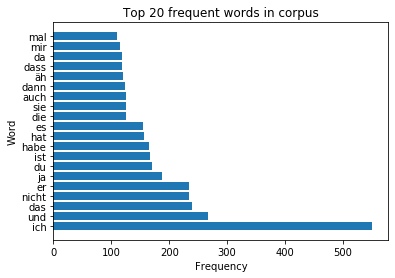

In [38]:


counts_per_word = Counter(corpus)
most_common_words = counts_per_word.most_common()
top_20_most_common_words = most_common_words[:20]

plot_words = []
plot_counts = []

for word, freq in top_20_most_common_words:
    plot_words.append(word)
    plot_counts.append(freq)

plt.barh(plot_words,plot_counts)
plt.title("Top 20 frequent words in corpus")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


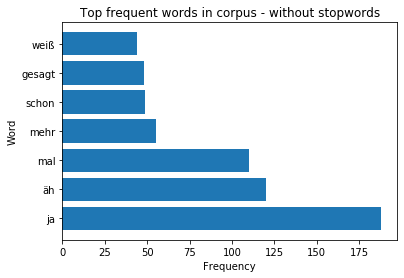

In [142]:
# Removing stopwords from corpus

import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords = stopwords.words("german")
stopwords

#Plot top words without stop words

top_20_most_common_words = most_common_words[:50]

plot_words_without_stopwords = []
plot_counts_without_stopwords = []

for word, freq in top_20_most_common_words:
    if word not in stopwords:
        plot_words_without_stopwords.append(word)
        plot_counts_without_stopwords.append(freq)

plt.barh(plot_words_without_stopwords,plot_counts_without_stopwords)
plt.title("Top frequent words in corpus - without stopwords")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [29]:
speakers_df['Gender_binary'] = pd.Categorical(speakers_df.Gender).codes

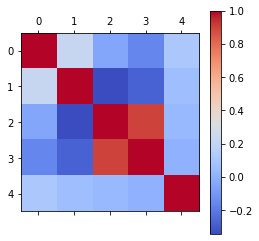

In [38]:
# Correlation matrix

plt.matshow(speakers_df.corr(),cmap='coolwarm')
plt.colorbar()
plt.show()

In [39]:
# Correlation matrix for numerical variables

corr = speakers_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SpeakerID,Valence,Activation,Dominance,Gender_binary
SpeakerID,1.000000,0.219162,-0.040412,-0.157751,0.113559
Valence,0.219162,1.000000,-0.342566,-0.273498,0.064076
Activation,-0.040412,-0.342566,1.000000,0.903700,0.037585
Dominance,-0.157751,-0.273498,0.903700,1.000000,0.006725
Gender_binary,0.113559,0.064076,0.037585,0.006725,1.000000


Gender does not seem to have a strong correlation - unexpected <br/>
Activation and dominance have a strong correlation <br/>
Activation and valence have a weak negative correlation <br/>

In [7]:
# Summary statistics of acoustic features

speech_path = './data/VAM_Audio/data/speech/'
filename = 'Satz01000.wav'
audio_np, sample_rate = librosa.load(speech_path+filename)

sample_rate


22050

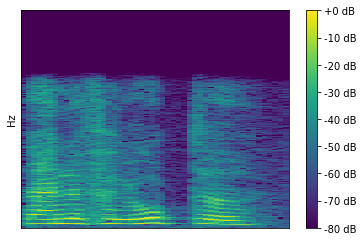

In [9]:
import librosa.display

STFT = librosa.stft(audio_np)
audio_db = librosa.amplitude_to_db(np.abs(STFT), ref=np.max)
librosa.display.specshow(audio_db,cmap='viridis')
plt.ylabel("Hz")
plt.colorbar(format="%+2.f dB")

Text(0.5, 1, 'Waveform for PID 1, Speech 1')

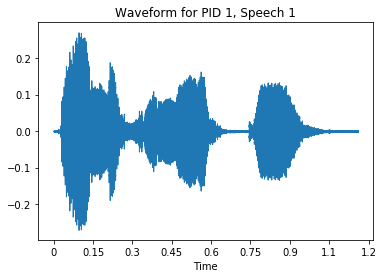

In [13]:
librosa.display.waveshow(audio_np, sr=sample_rate)
plt.title("Waveform for PID 1, Speech 1")

(20, 50)

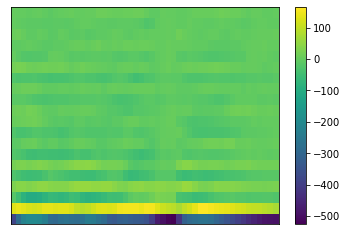

In [111]:
# Mel-frequency cepstral coefficients

mfcc = librosa.feature.mfcc(audio_np,sample_rate,n_mfcc=20)
librosa.display.specshow(mfcc,cmap='viridis')
plt.colorbar()

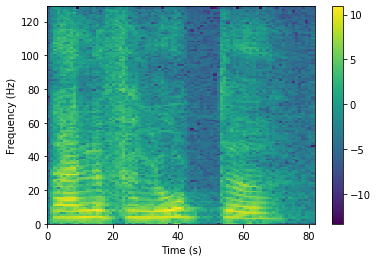

In [103]:
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read(speech_path+filename)

# Convert wav from stereo to mono
samples = samples.astype(float)
samples = samples.sum(axis=1)/2

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(np.log(spectrogram))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

In [ ]:
# Average length of sentence / duration per speaker

In [57]:
# Get list of all file names with ewe

# helper function to get ewe_df for each speaker

def get_ewe_dataframe(data_path):
    
    ewe_list = []
    
    for ewe_files in os.listdir(data_path):
        if(ewe_files.endswith(".ewe")):
            ewe = pd.read_csv(data_path+ewe_files,delim_whitespace=True,header=None,names=["Valence","Activation","Dominance"])
            ewe.astype('float64')
            ewe_list.append(ewe)
    ewe_df = pd.concat(ewe_list,ignore_index=True)
    return ewe_df

ewe_df = get_ewe_dataframe(data_path)

In [42]:
# Paths

data_path = "./VAM_Audio/data/Sprecher01/"



In [ ]:
# Read all data from all speakers
# Read data from speaker 1

ewe = pd.read_csv(data_path+"Sprecher01/Satz01000.ewe",delim_whitespace=True,header=None,names=["Valence","Activation","Dominance"])
ewe.astype('float64')


In [11]:
f = open(data_path + "Sprecher01/Satz01000.eva", "r")
print(f.read())

 -5.0000000e-001  0.0000000e+000  5.0000000e-001
 -5.0000000e-001  0.0000000e+000 -5.0000000e-001
 -5.0000000e-001  0.0000000e+000  0.0000000e+000
 -5.0000000e-001  0.0000000e+000  0.0000000e+000
 -1.0000000e+000 -5.0000000e-001 -5.0000000e-001
 -5.0000000e-001 -5.0000000e-001  0.0000000e+000
 -5.0000000e-001  0.0000000e+000 -5.0000000e-001
  0.0000000e+000 -5.0000000e-001  0.0000000e+000
 -5.0000000e-001  0.0000000e+000 -5.0000000e-001
 -5.0000000e-001  0.0000000e+000  0.0000000e+000
 -5.0000000e-001  5.0000000e-001  0.0000000e+000
 -5.0000000e-001 -5.0000000e-001  0.0000000e+000
 -5.0000000e-001  5.0000000e-001  5.0000000e-001
  0.0000000e+000  0.0000000e+000  0.0000000e+000
 -5.0000000e-001  0.0000000e+000 -5.0000000e-001
 -5.0000000e-001  5.0000000e-001  0.0000000e+000
 -5.0000000e-001  0.0000000e+000 -5.0000000e-001



In [32]:
ewa = pd.read_csv(data_path+"Sprecher01/Satz01000.eva",delim_whitespace=True,header=None,names=["Valence","Activation","Dominance"])
ewa.astype('float64')

,Valence,Activation,Dominance
0,-0.5,0.0,0.5
1,-0.5,0.0,-0.5
2,-0.5,0.0,0.0
3,-0.5,0.0,0.0
4,-1.0,-0.5,-0.5
5,-0.5,-0.5,0.0
6,-0.5,0.0,-0.5
7,0.0,-0.5,0.0
8,-0.5,0.0,-0.5
9,-0.5,0.0,0.0


In [34]:
ewe = pd.read_csv(data_path+"Sprecher01/Satz01000.ewe",delim_whitespace=True,header=None,names=["Valence","Activation","Dominance"])
ewe.astype('float64')

,Valence,Activation,Dominance
0,-0.477663,-0.025782,-0.0982
